<a href="https://colab.research.google.com/github/SarinaMashreghi/ML-notebooks/blob/main/tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression with neural network


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
X = tf.constant(np.array([-2,1,4,7,10,13]))
Y = tf.constant(np.array([3,6,9,12,15,18]))

X[0].shape, Y[0].shape 

(TensorShape([]), TensorShape([]))

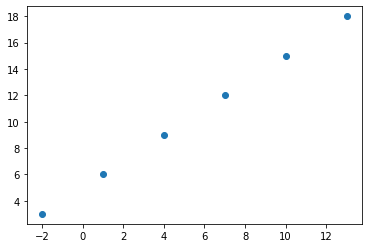

In [ ]:
plt.scatter(X,Y)

##Creating the model

In [ ]:
tf.random.set_seed(42)

# 1. define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. compile the model: loss, optimizer, metrics
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #optimizer="sgd"
              metrics=["mae"])

# 3. fit the model: x, y, epochs

model.fit(tf.expand_dims(X, axis=-1),Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 7.3647 - mae: 7.3647
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 7.0522 - mae: 7.0522
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 6.7397 - mae: 6.7397
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 6.4272 - mae: 6.4272
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 6.1147 - mae: 6.1147
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 5.8022 - mae: 5.8022
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 5.4897 - mae: 5.4897
Epoch 8/10
1/1 [==============================] - 0s 20ms/step - loss: 5.1772 - mae: 5.1772
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 4.8647 - mae: 4.8647
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 4.5522 - mae: 4.5522


In [ ]:
X, Y

(<tf.Tensor: shape=(6,), dtype=int64, numpy=array([-2,  1,  4,  7, 10, 13])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18])>)

In [ ]:
# 4. predictions
model.predict([5])

array([[5.7002993]], dtype=float32)

##Improving the model

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
]) 

model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

model_2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

model_2.predict([5.])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.4951 - mae: 10.4951
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 16.2016 - mae: 16.2016
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 2.9240 - mae: 2.9240
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 1.7749 - mae: 1.7749
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 2.0771 - mae: 2.0771
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 4.7984 - mae: 4.7984
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 1.8337 - mae: 1.8337
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 3.8225 - mae: 3.8225
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 3.9703 - mae: 3.9703
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2.1125 - mae: 2.1125
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - lo

array([[9.404751]], dtype=float32)

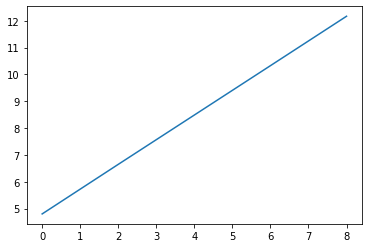

In [ ]:
# visualiztion

x_test = tf.expand_dims(tf.range(0, 10, delta=2), axis=-1)
y_test = model_2.predict(x_test)
plt.plot(x_test, y_test)


In [ ]:
# splitting train and test data

x_full = tf.range(0, 100, 3)
y_full = x_full +10

x_train = x_full[:int(len(x_full)*0.7)]
y_train = y_full[:int(len(y_full)*0.7)]

x_test = x_full[int(len(x_full)*0.7):]
y_test = y_full[int(len(y_full)*0.7):]

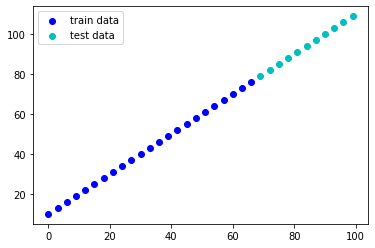

In [ ]:
plt.figure()
plt.scatter(x_train, y_train, c="b", label="train data")
plt.scatter(x_test, y_test, c="c", label="test data")
plt.legend()

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])
model_3.fit(x_test, y_test, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


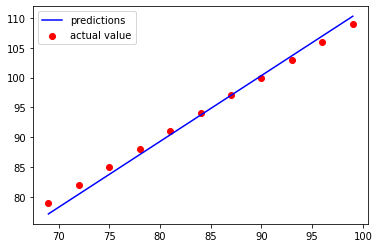

In [ ]:
y_pred = model_3.predict(x_test)

plt.plot(x_test,y_pred, c="b", label="predictions")
plt.scatter(x_test, y_test, c="r", label="actual value")
plt.legend()

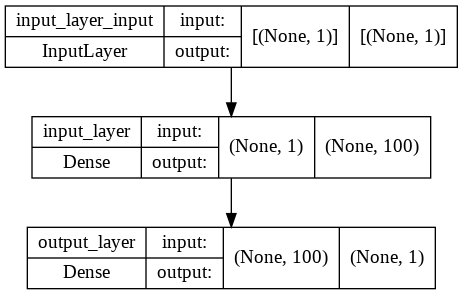

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)

##Evaluation Metrics

In [ ]:
model_3.evaluate(x_test, y_test)

1/1 [==============================] - 0s 325ms/step - loss: 0.8829 - mae: 0.8829


[0.8829429149627686, 0.8829429149627686]

In [ ]:
y_pred

array([[ 77.14153 ],
       [ 80.45569 ],
       [ 83.769844],
       [ 87.08401 ],
       [ 90.39816 ],
       [ 93.71232 ],
       [ 97.026474],
       [100.34063 ],
       [103.654785],
       [106.96894 ],
       [110.2831  ]], dtype=float32)

In [ ]:
# mean absolute error
tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8829429>

In [ ]:
# mean square error
tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0697044>

##Saving models


In [ ]:
# SavedModel format
model_3.save("tf_2")

In [ ]:
# HDF5 format
model_3.save("tf_2_hdf5.h5")

##Loading models


In [ ]:
# SavedModel
loaded_model = tf.keras.models.load_model("/content/tf_2")
loaded_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


##Medical cost model

In [ ]:
insurance = pd.read_csv("/content/drive/MyDrive/ML/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

h = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 1s 3ms/step - loss: 13345.2676 - mae: 13345.2676
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 13236.0645 - mae: 13236.0645
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 13038.1416 - mae: 13038.1416
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 12726.2998 - mae: 12726.2998
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 12293.0371 - mae: 12293.0371
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 11734.4873 - mae: 11734.4873
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 11062.8311 - mae: 11062.8311
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 10280.4307 - mae: 10280.4307
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 9486.5293 - mae: 9486.5293
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 8743.1221 - mae: 8743.

In [ ]:
insurance_model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 6017.8398 - mae: 6017.8398


[6017.83984375, 6017.83984375]

Text(0.5, 0, 'epochs')

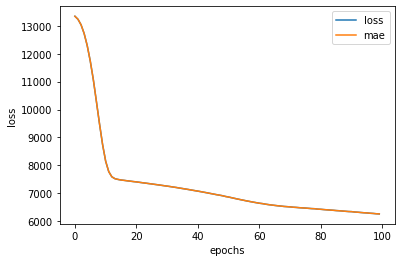

In [ ]:
pd.DataFrame(h.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")











##Data preprocessing (normalization) 

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


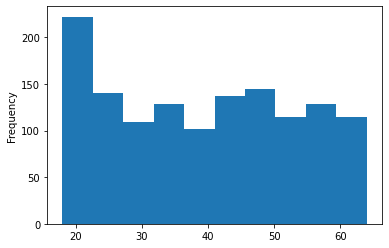

In [ ]:

X["age"].plot(kind="hist")

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# type(insurance), X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[0.54347826, 0.24535916, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.52031208, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.58695652, 0.39104116, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
ins_mdl_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

ins_mdl_normalized.compile(loss="mae",
                           optimizer=tf.keras.optimizers.Adam(lr=0.01),
                           metrics=["mae"])

histpry2 = ins_mdl_normalized.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 0s 2ms/step - loss: 13371.3838 - mae: 13371.3838
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 13321.8457 - mae: 13321.8457
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 13203.0225 - mae: 13203.0225
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 12997.7939 - mae: 12997.7939
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 12699.6436 - mae: 12699.6436
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 12307.0479 - mae: 12307.0479
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 11827.3984 - mae: 11827.3984
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 11290.3838 - mae: 11290.3838
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 10760.6484 - mae: 10760.6484
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 10244.6064 - mae: 10

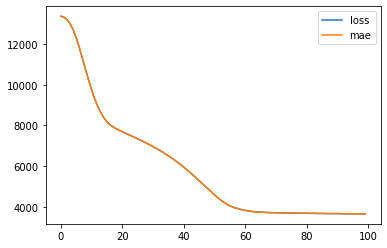

In [ ]:
pd.DataFrame(histpry2.history).plot()